In [1]:
import numpy as np
xf = np.linspace(0,100,100)
#taking a linear polynomial and adding some gaussian error
error = np.random.randn(100)
y = 0.42*xf +8 + error
x = xf/100
ones = np.ones_like(x)
x = np.column_stack((x,ones))

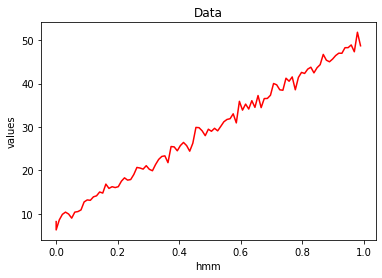

In [2]:
import matplotlib.pyplot as plt
xaxis = np.array(x[0][0])
for i in range(99):
    xaxis = np.append(xaxis, x[i][0])
plt.plot(xaxis,y,'r')
plt.xlabel('hmm')
plt.ylabel('values')
plt.title('Data')
plt.show()

In [3]:
def get_gradient(w,x,y):
    y_estimate = x.dot(w).flatten()
    error = (y.flatten()-y_estimate)
    gradient = -(2.0/len(x)) * error.dot(x)
    error = abs(error)/100
    return gradient, np.power(error,2)

In [4]:
w=np.array(42)
w=np.append(w,8)
alpha = 0.5
tolerance = 1e-5
iterations =1

while True:
    gradient,error = get_gradient(w,x,y)
    new_w = w- alpha*gradient
    if  np.sum(abs(new_w-w))<tolerance:
        print ("Converged")
        print (new_w,np.sum(error),gradient)
        break
    iterations+=1
    w=new_w

Converged
[42.01770609  7.94924781] 0.010003594578914437 [-1.28576238e-05  6.89084083e-06]


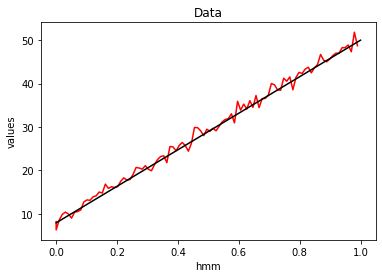

In [5]:
xaxis = np.array(x[0][0])
for i in range(99):
    xaxis = np.append(xaxis, x[i][0])
plt.plot(xaxis,y,'r')
plt.xlabel('hmm')
plt.ylabel('values')
plt.title('Data')
plt.plot(x,new_w[0]*x + new_w[1],'black')
plt.show()
#Squared loss function graph, fits very well.

In [6]:
#Taking |x-x'|^3 as error function
def get_gradient_1(w,x,y):
    y_estimate = x.dot(w).flatten()
    error = (y.flatten()-y_estimate)
    error2 = abs(error)/100
    error2 = np.power(error,2)
    gradient = -(3.0/len(x)) * error2.dot(x)
    error = error/100
    return gradient, np.power(error,3)

In [7]:
w=np.array(42)
w=np.append(w,8)
alpha = 0.5
tolerance = 1e-5
iterations =1

while True:
    gradient,error = get_gradient_1(w,x,y)
    new_w = w- alpha*gradient
    if(iterations>1 and abs(np.sum(prev_grad))<abs(np.sum(gradient))):
        print("Min")
        print (new_w,np.sum(error),gradient)
        break
    if  np.sum(abs(new_w-w))<tolerance:
        print ("Converged")
        print (new_w,np.sum(error),gradient)
        break
    iterations+=1
    w=new_w
    prev_grad = gradient

Min
[42.00823846  8.01489513] 0.00017018396763010158 [-0.0001666  -0.00030122]


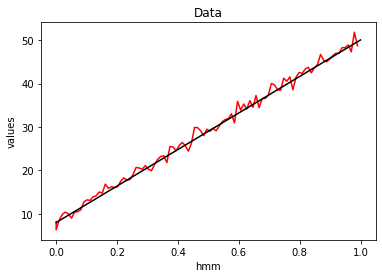

In [8]:
xaxis = np.array(x[0][0])
for i in range(99):
    xaxis = np.append(xaxis, x[i][0])
plt.plot(xaxis,y,'r')
plt.xlabel('hmm')
plt.ylabel('values')
plt.title('Data')
plt.plot(x,new_w[0]*x + new_w[1],'black')
plt.show()

In [9]:
# In the cube loss function, the current solution fits well solely because the dataset was self generated. The initial value
# of the model parameters could be taken ideally,(i.e. the coefficients of the polynomial used for generating the dataset).
# Which would definitely not be possible if we apply the model to a real life example.

# Also, the gradient doesn't seem to come down below the threshold value and starts to rapidly increase, after which
# in a short while, the memory limit of an integer exceeds. and if it keeps increasing, that isn't helpful at all.

In [10]:
# Below is an example of what happens if we take some arbitrary starting points, say (0.5 and 9).
w=np.array(0.5)
w=np.append(w,9)
alpha = 0.005
tolerance = 1e-5
iterations =1

while True:
    gradient,error = get_gradient_1(w,x,y)
    new_w = w- alpha*gradient
    if(iterations>i and abs(np.sum(prev_grad))<abs(np.sum(gradient))):
        print("Min")
        print (new_w,np.sum(error),gradient)
        break
    if  np.sum(abs(new_w-w))<tolerance:
        print ("Converged")
        print (new_w,np.sum(error),gradient)
        break
    iterations+=1
    w=new_w
    prev_grad = gradient

Min
[11.95814574 25.40179724] 0.10333104455577415 [-0.0087768  -0.02510683]


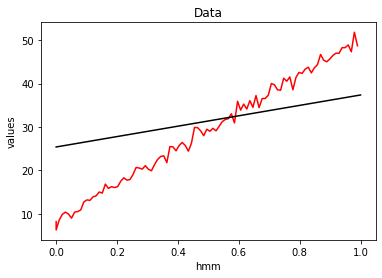

In [11]:
xaxis = np.array(x[0][0])
for i in range(99):
    xaxis = np.append(xaxis, x[i][0])
plt.plot(xaxis,y,'r')
plt.xlabel('hmm')
plt.ylabel('values')
plt.title('Data')
plt.plot(x,new_w[0]*x + new_w[1],'black')
plt.show()

In [12]:
# Taking a relatively arbitrary value of the starting point gives quite a bad solution. The loop has exited when the gradient
# started to increase, which means, this is probably the best solution it gives.
# Another point worth noting is that it only gives this solution if the learning rate is kept quite low(which means, we can't)
# trust the gradient very well and it seems to be very volatile.

In [13]:
# An example of what happens without the additional break condition
w=np.array(0.5)
w=np.append(w,9)
alpha = 0.005
tolerance = 1e-5
iterations =1

while True:
    gradient,error = get_gradient_1(w,x,y)
    new_w = w- alpha*gradient
    if  np.sum(abs(new_w-w))<tolerance:
        print ("Converged")
        print (new_w,np.sum(error),gradient)
        break
    iterations+=1
    w=new_w
    prev_grad = gradient
    if iterations % 1000==0:
        print(gradient,np.sum(error))

[-0.11252342 -0.14735451] 1.4495090487901423
[-0.10411099 -0.13558372] 1.2910550191166987
[-0.0966496  -0.12523457] 1.1559339932732422
[-0.08999825 -0.11608974] 1.0399261506571633
[-0.08404132 -0.10797187] 0.9397050307361138
[-0.07868328 -0.10073504] 0.8526215269526134
[-0.07384462 -0.0942583 ] 0.7765492172185907
[-0.06945871 -0.08844078] 0.7097683889562952
[-0.06546939 -0.08319775] 0.6508767812848338
[-0.06182902 -0.0784577 ] 0.5987227089920083
[-0.05849698 -0.0741599 ] 0.5523538870151935
[-0.05543845 -0.0702525 ] 0.510977606304886
[-0.05262345 -0.06669106] 0.47393119551097246
[-0.05002605 -0.06343729] 0.44065713600007395
[-0.0476237  -0.06045807] 0.4106832831837329
[-0.04539677 -0.05772463] 0.3836082595470804
[-0.04332804 -0.05521189] 0.3590896009126405
[-0.0414024  -0.05289791] 0.3368333275519107
[-0.03960651 -0.05076342] 0.31658596641749814
[-0.0379286  -0.04879146] 0.2981281328658432
[-0.03635819 -0.04696704] 0.28126929746956225
[-0.03488599 -0.04527688] 0.26584343845600605
[-0.03

<ipython-input-6-6ba6a474bafd>:6: RuntimeWarning: overflow encountered in power
  error2 = np.power(error,2)
<ipython-input-6-6ba6a474bafd>:8: RuntimeWarning: overflow encountered in power
  return gradient, np.power(error,3)


[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan n

KeyboardInterrupt: 

In [14]:
# We get on overflow error, even though we've taken the mean of the error. And even though the learning rate is very small.